<a href="https://colab.research.google.com/github/ilham-fikri/Project-Data-Mining/blob/main/Project_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv("covid.csv") #Memunculkan file csv yang diinginkan
data.head()                     #Untuk menampilkan 5 data awal

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [12]:
data.info() #Memberi tahu info tentang data yg kita tampilkan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [13]:
latest_date = '2021-05-30 04:20:55'
data[data['Last Update']==latest_date]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
305664,305665,05/29/2021,NaN,Afghanistan,2021-05-30 04:20:55,70111.0,2899.0,57281.0
305665,305666,05/29/2021,NaN,Albania,2021-05-30 04:20:55,132297.0,2449.0,129215.0
305666,305667,05/29/2021,NaN,Algeria,2021-05-30 04:20:55,128456.0,3460.0,89419.0
305667,305668,05/29/2021,NaN,Andorra,2021-05-30 04:20:55,13693.0,127.0,13416.0
305668,305669,05/29/2021,NaN,Angola,2021-05-30 04:20:55,34180.0,757.0,27646.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [14]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique() #Untuk mengetahui Negara yang data konfirmasinya lebih dari 0
unique_countries.sort() #Untuk menyortir datanya
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

In [15]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [16]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Kyrgyzstan', 104222.0), ('South Africa', 1659070.0), ('Cyprus', 72363.0), ('Thailand', 151842.0), ('Martinique', 0.0), ('Congo (Brazzaville)', 11658.0), ('Jordan', 734659.0), ('Gambia, The', 0.0), ('Singapore', 62003.0), ('Macau', 51.0), ('Denmark', 280183.0), ('Ivory Coast', 47233.0), ('Sweden', 1068473.0), ('Bangladesh', 797386.0), ('Somalia', 14653.0), ('Maldives', 62906.0), ('Guinea', 23172.0), ('Iran', 2893218.0), ('Morocco', 518868.0), ('Serbia', 712046.0), ('Peru', 1947555.0), ('Algeria', 128456.0), ('Republic of the Congo', 0.0), ('San Marino', 5089.0), ('Sri Lanka', 180593.0), ('Montenegro', 99566.0), ('Croatia', 355955.0), ('Argentina', 3732263.0), ('Lesotho', 10825.0), ('Portugal', 848213.0), ('Guernsey', 0.0), ('Chad', 4928.0), ('Czech Republic', 1660935.0), ('Egypt', 260659.0), ('Republic of Ireland', 0.0), ('Mauritania', 19463.0), ('Iraq', 1193608.0), ('Lithuania', 273866.0), ('Saint Kitts and Nevis', 68.0), ('Colombia', 3363061.0), ('North Ireland', 0.0), ('Afghanista

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,50,50])
ax.bar(unique_countries,country_confirmed_case)
plt.show

<function matplotlib.pyplot.show>

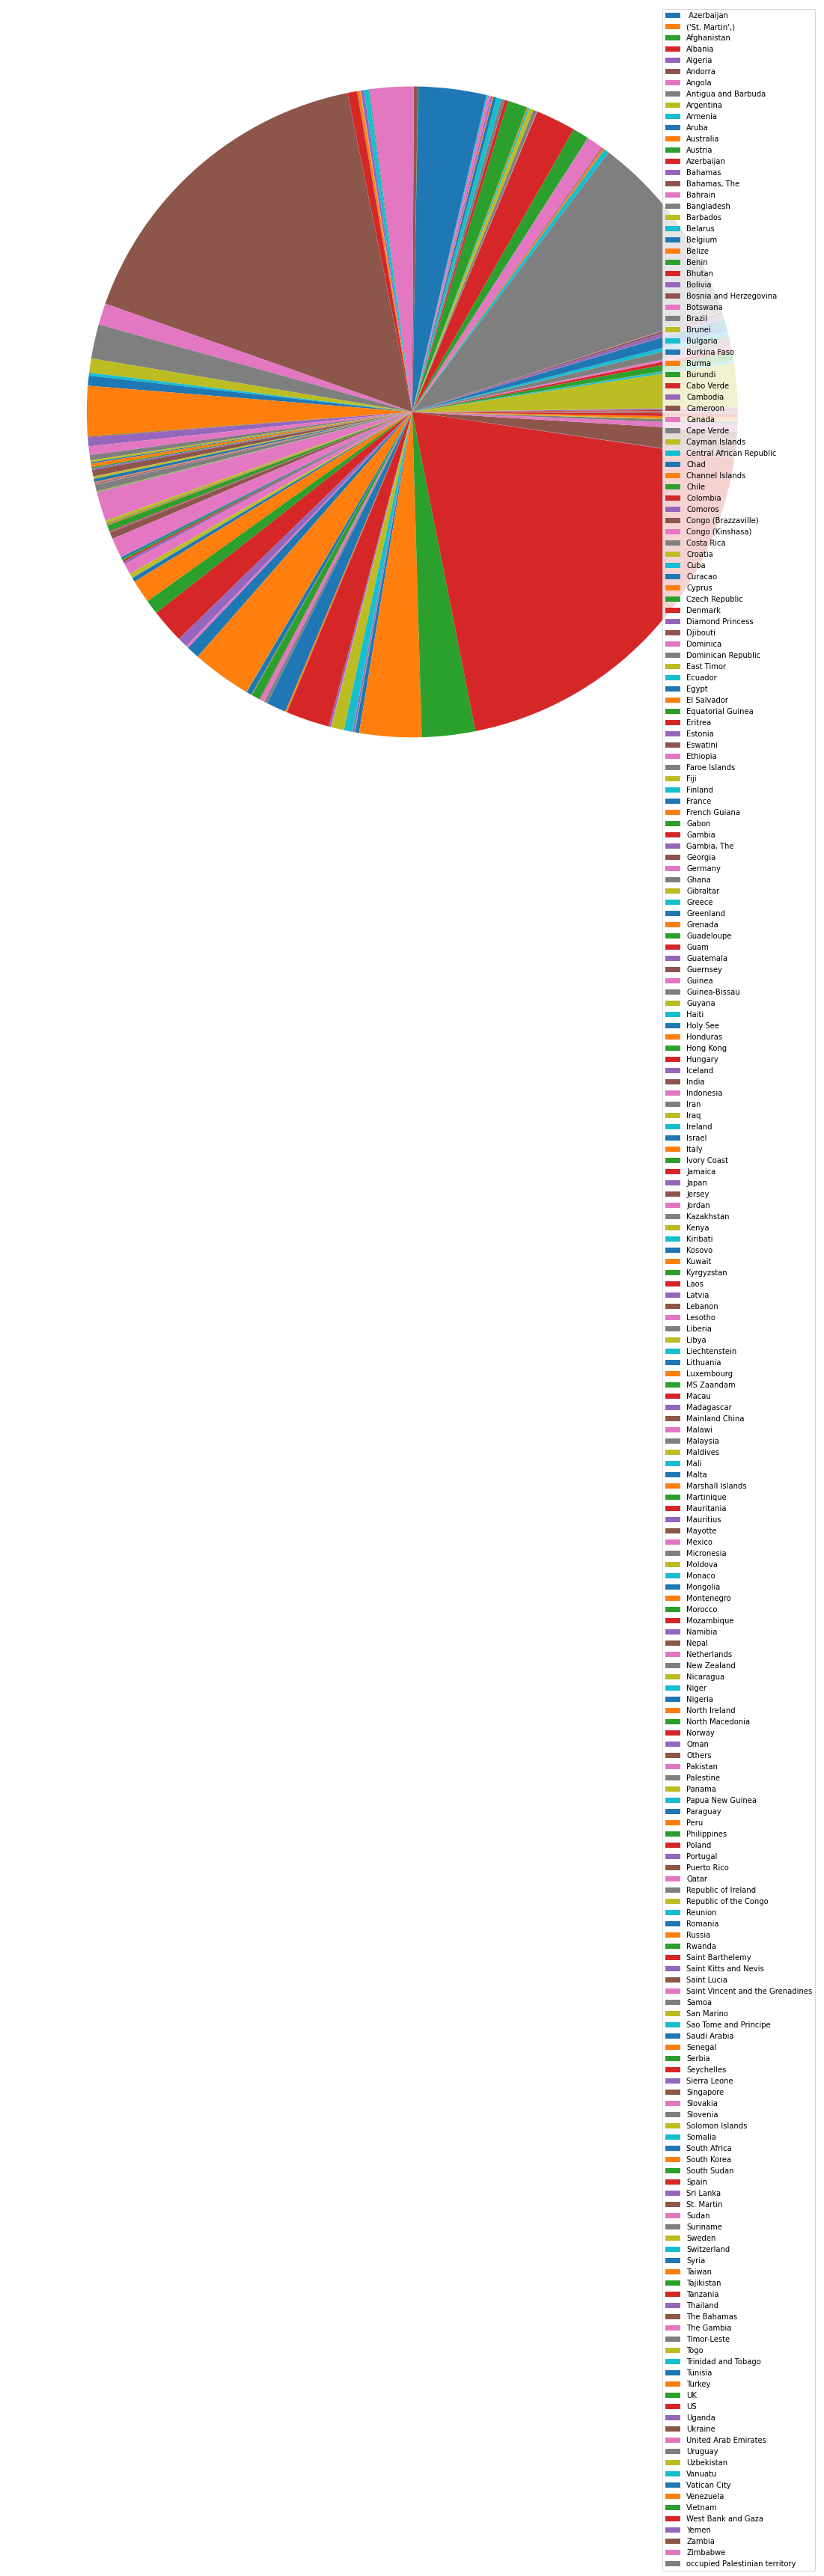

In [27]:
plt.figure(figsize=(20,20))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()